<h1>Tutorial: Agent-Based Simulation of Crowd Flocking & Evacuation Behavior (BOIDS Problem)</h1>

This 3-part tutorial illustrates different ways to model the of simulation of crowd evacuation behaviour, which is sometimes referred to as the BOIDS problem. The parts, in brief, are as follows:
<ul>
<li>Part 1 (Setup): We'll show how a working 2D BOIDS model can be modeled over a geometric region using Realtime Simulation GUI for PyCX (Copyright 2012 Chun Wong & Hiroki Sayama) </li>

<li>Part 2: The agent-based simulation of crowd flocking behaviour.
This part explains how to use and implement a realtime simulation GUI for PyCX for modeling crowd behaviour. You can think of this method as a way to analyze the dynamics of the BOIDS model without having to run many simulations. This part shows how our Agent.py models these behaviours and how to create one.</li>

<li>Part 3: The agent-based simulation of evacuation behaviour</li>
</ul>

Part 1: A Simple Boid Simulation

<h2>Conceptual model:</h2>

Each boid has direct access to the whole scene's geometric description, but flocking requires that it reacts only to flockmates within a certain small neighborhood around itself. The neighborhood is characterized by a distance (measured from the center of the boid) and an angle, measured from the boid's direction of flight. Flockmates outside this local neighborhood are ignored. The neighborhood could be considered a model of limited perception (ie. birds in foggy skies) but it is probably more correct to think of it as defining the region in which flockmates influence a boids steering.

This is the main program for running a flocking simulation in python
It utilizes 2 objects: a boid (birdlike - behaving object) and a 3D Cartesian vector
To see the objects and their respective methods, you can look at boid.py

<h3>Setup</h3>
Run the following code cells to get everything set up for the boid simulation

In [1]:
import matplotlib
from IPython.display import clear_output
%matplotlib inline
import pylab as PL
import random as RD
import numpy as NP
from scipy.spatial import distance as dist
from Agent import Agent

RD.seed()

populationSize = 64
noiseLevel = 1
avoidanceRadius = 30
flockRadius = 100
boardDimension = 1000

#strengths are proportion of new weight vs proportion of old weight (0-1)
avoidanceStrength = 0.4
approachStrength = 0.6
alignStrength = 0.8
totalStrength = 0.2

def init():
    global time, agents

    time = 0
        
    agents = []
    for i in range(populationSize):
        row = i % 8.0
        col = i / 8.0
        newAgent = Agent(row*50.0+50.0, col*50.0+50.0, RD.gauss(0, noiseLevel), RD.gauss(0, noiseLevel), 0, 0)
        agents.append(newAgent)

def draw():
    x = [ag.posX for ag in agents]
    y = [ag.posY for ag in agents]
    PL.axis('scaled')
    
    PL.cla()
    PL.axis([0, boardDimension, 0, boardDimension])
    PL.title('t = ' + str(time))
    PL.plot(x, y, 'bo')

    PL.pause(0.03)

def step():
    """Update positions of each agent each time step"""
    global time, agents

    time += 1

#    d = dist.euclidean([agents[0].posX, agents[0].posY], [agents[1].posX, agents[1].posY])
#    print(d)

    for ag in agents:
        colVect = ag.collisions(ag, avoidanceRadius, agents)
        avgLoc, avgVel = ag.getFlock(agents, flockRadius)
        alignVect = ag.align(avgVel, populationSize)
        apprVect = ag.approach(avgLoc)
        
        weightTot = avoidanceStrength + alignStrength + approachStrength
        weights = [avoidanceStrength / weightTot, alignStrength / weightTot, approachStrength / weightTot]
        ag.newVelX = (1 - totalStrength) * ag.oldVelX + totalStrength * (colVect[0] * weights[0] + alignVect[0] * weights[1] + apprVect[0] * weights[2])       
        ag.newVelY = (1 - totalStrength) * ag.oldVelY + totalStrength * (colVect[1] * weights[0] + alignVect[1] * weights[1] + apprVect[1] * weights[2])
        
        # Update positions using new velocities
        # Last number changes speed on screen
        ag.posX += ag.newVelX * 0.2
        ag.posY += ag.newVelY * 0.2
        
        # Wraps agents around when they leave the screen
        # And shifts new weights to old weight position
        for ag in agents:
            ag.posX = ag.posX % boardDimension
            ag.posY = ag.posY % boardDimension
            ag.oldVelX = ag.newVelX
            ag.oldVelY = ag.newVelY
            

    

<h3>Start Simulation</h3>
Run this to see the simulation in action

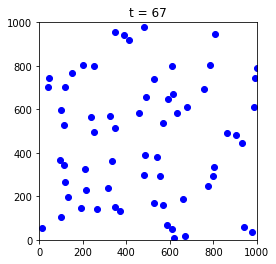

KeyboardInterrupt: 

In [2]:
init()
while(True):
    clear_output(wait=True)
    draw()
    step()